In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from collections import defaultdict
from bs4 import BeautifulSoup

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
dataset = pd.read_csv('review.csv')


In [3]:
dataset.shape

(4736897, 9)

In [4]:
stars=dataset['stars']

In [5]:
reviews=dataset['text']

In [6]:
stars.shape,dataset.shape,reviews.shape

((4736897,), (4736897, 9), (4736897,))

In [7]:
#X, Y = dataset.iloc[:,:-1], dataset.iloc[:, -1]
X_tr, X_test, Y_tr, Y_test = train_test_split(reviews,stars, test_size=0.1, random_state=1)


In [8]:
X_tr.shape,X_test.shape,Y_tr.shape,Y_test.shape

((4263207,), (473690,), (4263207,), (473690,))

In [9]:
X_train,X_val,Y_train,Y_val =train_test_split(X_tr,Y_tr,test_size=0.1,random_state=1)

In [10]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((3836886,), (426321,), (3836886,), (426321,))

In [11]:
Y_train.head()

4688885    4
562088     1
2741001    4
182994     5
3252309    1
Name: stars, dtype: int64

In [12]:
dataset['text length'] = dataset['text'].apply(len)

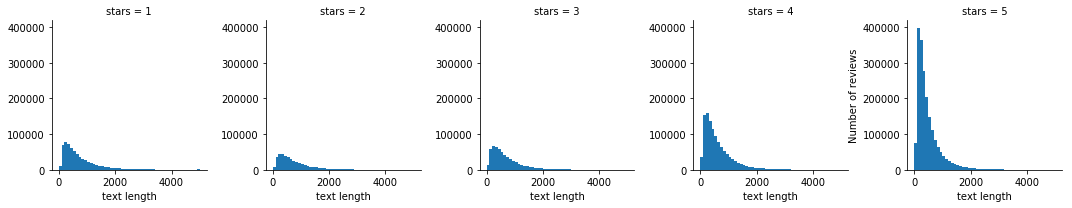

In [71]:
g = sns.FacetGrid(data=dataset, col='stars')
g.map(plt.hist, 'text length', bins=50)
plt.ylabel('Number of reviews')
plt.savefig('Review length')
plt.show()

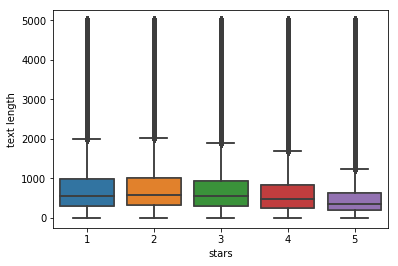

In [67]:
sns.boxplot(x='stars', y='text length', data=dataset)
plt.savefig('Box plot')
plt.show()

In [15]:
stars = dataset.groupby('stars').mean()
stars.corr()

,funny,useful,cool,text length
funny,1.000000,0.813452,-0.039738,0.906716
useful,0.813452,1.000000,-0.491146,0.910331
cool,-0.039738,-0.491146,1.000000,-0.452592
text length,0.906716,0.910331,-0.452592,1.000000


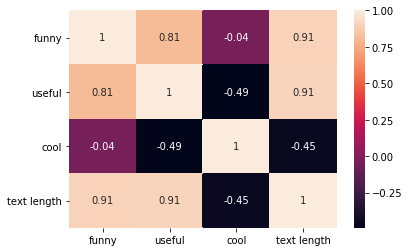

In [70]:
sns.heatmap(data=stars.corr(), annot=True)
plt.savefig('heatmap.png')
plt.show()

In [18]:
s=dataset['stars']
r=dataset['text']

In [ ]:
X_train.to_csv(r'training.txt', header=None, index=None, sep=' ', mode='a')

## Toy data

In [19]:
X_trans, X_toy, Y_trans, Y_toy = train_test_split(r,s, test_size=0.30, random_state=1)

In [20]:
Y_toy.shape,X_toy.shape

((1421070,), (1421070,))

In [21]:
import string
from nltk.corpus import stopwords

In [22]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
X_toy.size

1421070

In [24]:
from collections import defaultdict

In [25]:
bow = defaultdict(float)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [28]:
toy_data_features = vectorizer.fit_transform(X_toy)

In [32]:
toy_data_features.shape

(1421070, 5000)

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X_toy[:50000])

In [ ]:
X = bow_transformer.transform(X_toy[:50000])

In [ ]:
# USING BOW TRANSFORMER AND TEXT PROCESS
xx_train, xx_test, yy_train, yy_test = train_test_split(X, Y_toy[:50000], test_size=0.2, random_state=101)

In [53]:
#using toy-DATA EATURES
tx_train, tx_test, ty_train, ty_test = train_test_split(toy_data_features[:50000], Y_toy[:50000], test_size=0.2, random_state=101)

In [54]:
tx_train.shape

(40000, 5000)

## NAIVE BAYES

In [55]:
nb = MultinomialNB()
nb.fit(tx_train, ty_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
tx_train.shape

(40000, 5000)

In [57]:
preds = nb.predict(tx_test)

In [58]:
print (len(preds))

10000


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
print(confusion_matrix(ty_test, preds))

[[ 915  264   91   34   30]
 [ 201  257  290   62   29]
 [ 111  137  462  386   69]
 [ 101   74  290 1379  587]
 [ 220   51   72 1137 2751]]


In [60]:
print(classification_report(ty_test, preds))

             precision    recall  f1-score   support

          1       0.59      0.69      0.63      1334
          2       0.33      0.31      0.32       839
          3       0.38      0.40      0.39      1165
          4       0.46      0.57      0.51      2431
          5       0.79      0.65      0.71      4231

avg / total       0.60      0.58      0.58     10000



## BASELINE ACCURACY

In [113]:
dataset['stars'].value_counts()

5    1988003
4    1135830
1     639849
3     570819
2     402396
Name: stars, dtype: int64

In [106]:
len(dataset['stars'])

4736897

In [108]:
1988003/4736897

0.41968465854334597

## RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest = RandomForestClassifier(n_estimators = 100) 

In [62]:
forest = forest.fit( tx_train, ty_train )

In [49]:
pre=forest.predict(tx_test)

In [51]:
print(classification_report(ty_test, pre))

             precision    recall  f1-score   support

          1       0.67      0.56      0.61       291
          2       0.50      0.01      0.01       167
          3       0.33      0.03      0.06       237
          4       0.36      0.24      0.29       454
          5       0.54      0.90      0.68       851

avg / total       0.49      0.53      0.45      2000

